# Data Analysis

This section is dedicated to Exploratory Data Analysis of the data collected between different room types. Statistics, trends, and plots are graphed here. All data was collected into CSVs, which can be found in the /power_profiler_scan/ folder. All output files and graphs are sent to the /data_analysis/ folder. 

In [2]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt

## Functions

Here all necessary functions are defined for later use for analysis. 

In [ ]:
"""
Reads in a given CSV file, then filters rows based on the given time range. 

Parameters:
csv_file (str): The path to the CSV file.
start_time (int): The start time to filter the data.
end_time (int): The end time to filter the data.
"""
def read_csv(csv, start_time, end_time):
    #Load csv files 
    df = pd.read_csv(csv)

    #Drop unnecessary rows and columns 
    df.drop(index=0, inplace=True)
    df.drop(columns='events', inplace=True)

    #Convert all columns to numeric (if they aren't already)
    df = df.apply(pd.to_numeric, errors='coerce')

    #Filter rows based on the time range for the scanning period
    scan_df = df[(df['time'] >= start_time) & (df['time'] <= end_time)]

    return scan_df

"""
Takes the modified dataframe of the original CSV file and calculates statistical data. 
Returns a dataframe which composites all of the new data. 

Parameters: 
df (DataFrame (pandas)): The modified dataframe. 
"""
def calc_stat(df):
    #Make a copy of the dataframe for modification. 
    copy = df.copy()

    #Drop the time column when calculating statistics of the dataframe.
    copy.drop(columns='time', inplace=True)

    #Calculate the mean, median, and standard deviation
    avg_df = copy.mean(numeric_only=True)
    med_df = copy.median(numeric_only=True)
    sd_df = copy.std(numeric_only=True)

    #Combine the results into a DataFrame (renamed to pi_table)
    pi_table = pd.DataFrame({
        'Mean': avg_df,
        'Median': med_df,
        'Standard Deviation': sd_df
    })

    return pi_table

""" 


"""
def plot_all_groups(windows_group, blinds_group, hallway_group, category):
    fig = plt.subplots(1, 3, figsize=(25, 5), sharey=True)
    fig.suptitle(f'{category} vs. Time for Different Groups', fontsize=24)

    plot_trials(windows_group, category, 'Windows')
    plot_trials(blinds_group, category, 'Blinds')
    plot_trials(hallway_group, category, 'Hallway')

    return fig


"""
Plots all of the dataframes for a certain performance indicator, then saves the plot to a particular path. 

Parameters:
total (arr[Dataframe (pandas)]): all arrays that will be plotted 
category (str): the specific performance indicator interested
path (str): the path which the file will be saved to

Returns a figure (plot) of trials. 

"""
def plot_trials(total, category, group_name):     
    fig = plt.subplots(figsize=(25, 5))

    # Customize Plot
    plt.title(f'{group_name}:{category} vs. Time', fontsize=20)
    plt.xlabel('Time (s)', fontsize=15)
    plt.ylabel('Power (mW)', fontsize=15)
    plt.tick_params(axis='x', rotation=30, labelsize=15)

    min_time = 1000
    max_time = 0

    for i in range(len(total)):
        df = total[i].set_index('time')
        plot, = plt.plot(df.index, df[category])
        plot.set_label(f'Trial #{i+1}')

        min_time = min(min_time, df.index.min())
        max_time = max(max_time, df.index.max())
        
    plt.xlim(min_time, max_time)
    plt.legend()

    return fig

"""
This will plot a singular dataframe for a certain performance indicator, then saves the plot to a particular path. 

Parameters:
df (Dataframe (pandas)): the specific dataframe to be plotted
category (str): the specific performance indicator interested
path (str): the path which the file will be saved to

Returns a plot of a single trial. 

"""
def plot_csv(df, category, path):
    fig = plt.subplots(figsize=(16, 5))

    # Customize Plot
    plt.title(f'{category} vs. Time', fontsize=20)
    plt.xlabel('Time (s)', fontsize=15)
    plt.ylabel('Power (mW)', fontsize=15)
    plt.tick_params(axis='x', rotation=30, labelsize=15)

    df = df.set_index('time')
    plt.xlim(df.index.min(), df.index.max())

    plt.plot(df.index, df[category])
    plt.savefig(path, bbox_inches='tight')

    return fig

"""
Saves and displays the given figure.

Parameters:
fig (matplotlib.figure.Figure): The figure to save and display.
path (str): The path to save the figure to.
"""
def save(path):
    plt.savefig(path, bbox_inches='tight')  # Save the figure
    plt.show()  # Display the figure

"""
Takes the modified dataframe of the original CSV file and calculates statistical data. 
Returns a dataframe which composites all of the new data. 

Parameters: 
df (DataFrame (pandas)): The modified dataframe. 
"""
def print_to_file(df, output):
    #Format the text output for readability
    output_file = output
    with open(output_file, 'w') as file:
        #Write the header with spacing
        file.write(f"{'Metric':<25}{'Mean':<20}{'Median':<20}{'Standard Deviation':<20}\n")
        file.write("-" * 85 + "\n")  # Adjust separator line width
        
        for metric, row in df.iterrows():
            # Write only Mean, Median, and Standard Deviation
            file.write(f"{metric:<25}{row['Mean']:<20.2e}{row['Median']:<20.2e}{row['Standard Deviation']:<20.2e}\n")

    print(f"Data successfully saved to {output_file}")

## Read Files
Read in files and assign them to dataframes for later analysis

In [5]:
# Input file paths 
windows_csv_0 = 'power_profiler_scan/windows/mr_windows_0.csv'
windows_1 = 'power_profiler_scan/windows/mr_windows_1.csv'
windows_2 = 'power_profiler_scan/windows/mr_windows_2.csv'
windows_3 = 'power_profiler_scan/windows/mr_windows_3.csv'

# Read in the csv
w_0 = read_csv(windows_csv_0, 46, 194)
w_1 = read_csv(windows_1, 34, 163)
w_2 = read_csv(windows_2, 33, 175)
w_3 = read_csv(windows_3, 35, 169)

# Input and output file paths 
blinds_csv_0 = 'power_profiler_scan/blinds/mr_blinds_0.csv'
blinds_1 = 'power_profiler_scan/blinds/mr_blinds_1.csv'
blinds_2 = 'power_profiler_scan/blinds/mr_blinds_2.csv'
blinds_3 = 'power_profiler_scan/blinds/mr_blinds_3.csv'

# Read in the csv
b_0 = read_csv(blinds_csv_0, 58, 234)
b_1 = read_csv(blinds_1, 45, 164)
b_2 = read_csv(blinds_2, 39, 157)
b_3 = read_csv(blinds_3, 38, 166)

# Input and output file paths 
hall_csv_1 = 'power_profiler_scan/hallway/hallway_1.csv'
hall_csv_2 = 'power_profiler_scan/hallway/hallway_2.csv'
hall_csv_3 = 'power_profiler_scan/hallway/hallway_3.csv'

output = 'data_analysis/hallway_comb.txt'

# Read in the csv
h_1 = read_csv(hall_csv_1, 34, 132)
h_2 = read_csv(hall_csv_2, 33, 123)
h_3 = read_csv(hall_csv_3, 34, 133)

## Statistics

Here we find statistical data from the scan trials of different room types (AKA: room with windows, room with blinds, and a hallway).

### Window Scan

In [66]:
# Input and output file paths 
output = 'data_analysis/windows_trial_0.txt'
output_all = 'data_analysis/windows_comb.txt'

# Combine the dataframes 
total = [w_1, w_2, w_3]

# Calculate the mean, median, and standard deviation (and print example of a few lines)
df = calc_stat(w_0)
print("Example Output:")
print(df.head())
print("...\n")

combined = pd.concat(total, ignore_index=True)
stat_combined = calc_stat(combined)
print("Example Output (Combined):")
print(stat_combined.head())
print("...\n")

# Output the statistics into file path given
print_to_file(df, output)

# Output the statistics into file path given
print_to_file(calc_stat(w_1), 'data_analysis/blinds_trial_1.txt')
print_to_file(calc_stat(w_2), 'data_analysis/blinds_trial_2.txt')
print_to_file(calc_stat(w_3), 'data_analysis/blinds_trial_3.txt')
print_to_file(stat_combined, output_all)

Example Output:
                  Mean     Median  Standard Deviation
wearable  6.402940e+06  6408000.0        1.069324e+05
soc       1.260885e+06  1243000.0        1.648849e+05
cvip      2.110346e+06  2066000.0        4.293415e+05
cpu       1.263579e+06  1199000.0        3.569126e+05
gpu       1.575549e+06   105000.0        2.251262e+06
...

Example Output (Combined):
                  Mean     Median  Standard Deviation
wearable  6.488812e+06  6500000.0        1.313916e+05
soc       1.287952e+06  1265000.0        1.761557e+05
cvip      1.659180e+06  1544000.0        3.642606e+05
cpu       1.224258e+06  1134000.0        3.775218e+05
gpu       1.887238e+06   188000.0        2.270971e+06
...

Data successfully saved to data_analysis/windows_trial_0.txt
Data successfully saved to data_analysis/blinds_trial_1.txt
Data successfully saved to data_analysis/blinds_trial_2.txt
Data successfully saved to data_analysis/blinds_trial_3.txt
Data successfully saved to data_analysis/windows_comb.txt


### Blinds Scan 

In [67]:
# Input and output file paths 
output = 'data_analysis/blinds_trial_0.txt'
output_all = 'data_analysis/blinds_comb.txt'

# Combine the dataframes 
total = [b_1, b_2, b_3]

# Calculate the mean, median, and standard deviation (and print example of a few lines)
df = calc_stat(b_0)
print("Example Output:")
print(df.head())
print("...\n")

combined = pd.concat(total, ignore_index=True)
stat_combined = calc_stat(combined)
print("Example Output (Combined):")
print(stat_combined.head())
print("...\n")

# Output the statistics into file path given
print_to_file(df, output)

# Output the statistics into file path given
print_to_file(calc_stat(b_1), 'data_analysis/blinds_trial_1.txt')
print_to_file(calc_stat(b_2), 'data_analysis/blinds_trial_2.txt')
print_to_file(calc_stat(b_3), 'data_analysis/blinds_trial_3.txt')
print_to_file(stat_combined, output_all)

Example Output:
                  Mean     Median  Standard Deviation
wearable  5.703647e+06  5569000.0        3.427687e+05
soc       1.264688e+06  1251000.0        1.585533e+05
cvip      1.665743e+06  1568000.0        2.970951e+05
cpu       1.218131e+06  1160000.0        3.619438e+05
gpu       1.970499e+06   168000.0        2.342810e+06
...

Example Output (Combined):
                  Mean     Median  Standard Deviation
wearable  5.848270e+06  5697000.0        3.836861e+05
soc       1.262025e+06  1243000.0        1.637376e+05
cvip      1.696413e+06  1626000.0        3.125037e+05
cpu       1.256464e+06  1178000.0        3.838867e+05
gpu       1.755231e+06   105000.0        2.312085e+06
...

Data successfully saved to data_analysis/blinds_trial_0.txt
Data successfully saved to data_analysis/blinds_trial_1.txt
Data successfully saved to data_analysis/blinds_trial_2.txt
Data successfully saved to data_analysis/blinds_trial_3.txt
Data successfully saved to data_analysis/blinds_comb.txt


### Hallway Scan 

In [68]:
# Input and output file paths 
output = 'data_analysis/hallway_comb.txt'

# Combine the dataframes 
total = [h_1, h_2, h_3]

# Calculate the mean, median, and standard deviation (and print example of a few lines)
combined = pd.concat(total, ignore_index=True)
stat_combined = calc_stat(combined)

# std_trials = calc_std_trials(total)
# stat_combined['Std Between Trials'] = std_trials

print("Example Output (Combined):")
print(stat_combined.head())
print("...\n")

# Output the statistics into file path given
print_to_file(calc_stat(h_1), 'data_analysis/hallway_trial_1.txt')
print_to_file(calc_stat(h_2), 'data_analysis/hallway_trial_2.txt')
print_to_file(calc_stat(h_3), 'data_analysis/hallway_trial_3.txt')

print_to_file(stat_combined, output)

Example Output (Combined):
                  Mean     Median  Standard Deviation
wearable  6.133947e+06  6198000.0        3.382510e+05
soc       1.274670e+06  1265000.0        1.499937e+05
cvip      1.530560e+06  1458000.0        2.457624e+05
cpu       1.291577e+06  1229000.0        3.931906e+05
gpu       1.715946e+06   105000.0        2.245197e+06
...

Data successfully saved to data_analysis/hallway_trial_1.txt
Data successfully saved to data_analysis/hallway_trial_2.txt
Data successfully saved to data_analysis/hallway_trial_3.txt
Data successfully saved to data_analysis/hallway_comb.txt


## Plots

Here we plot certain performance indicators for each scanning trial to determine consistent trends. 

### Hallway Plots

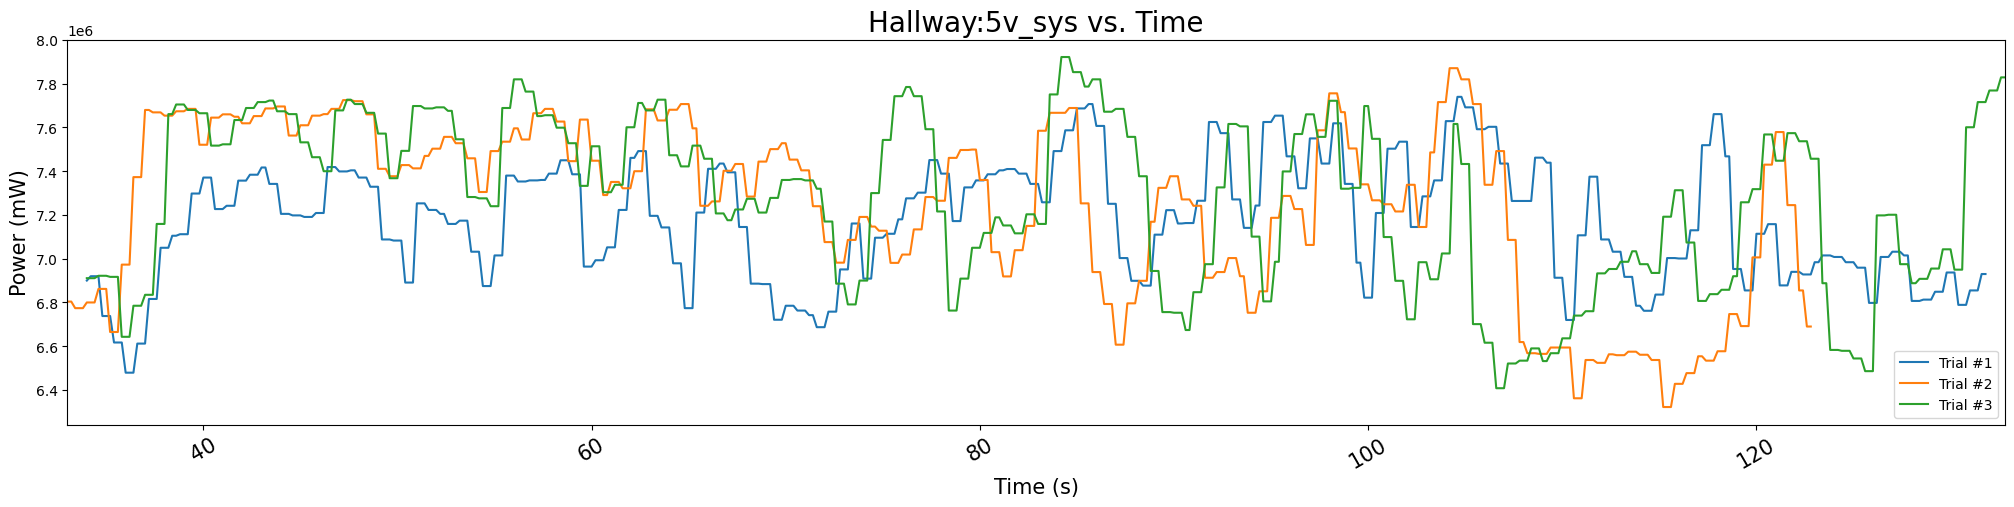

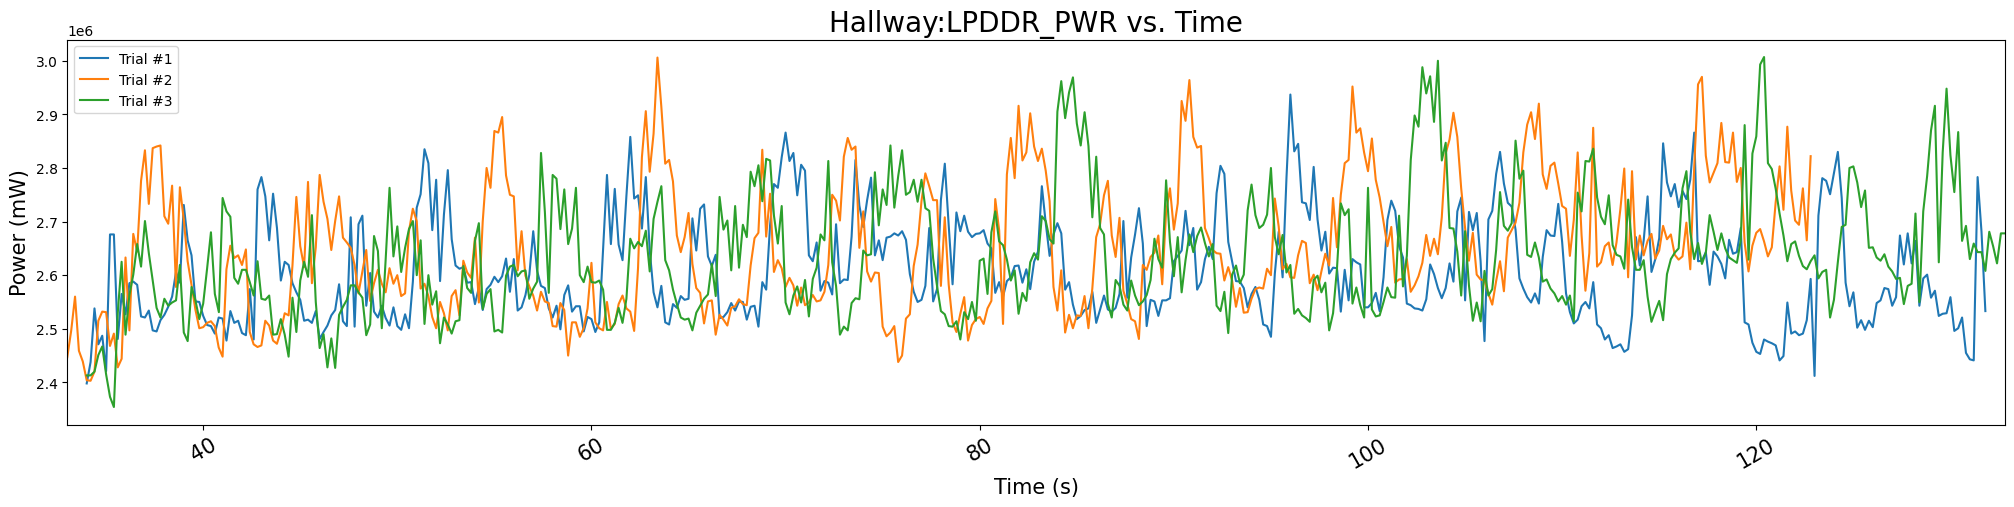

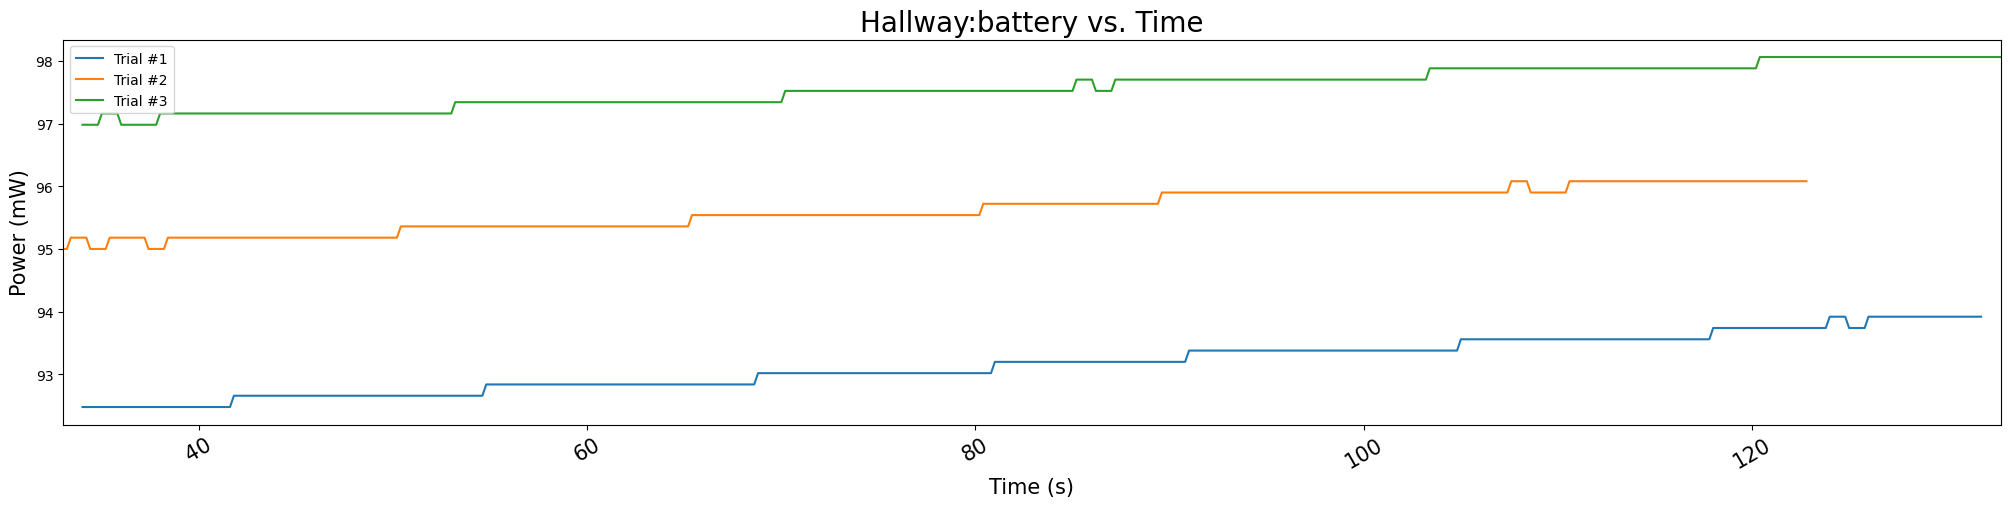

In [6]:
# Combine files 
total = [h_1, h_2, h_3]

# Print all time series of cvip over time 
plot_trials(total, '5v_sys', 'Hallway')
save('data_analysis/Hallway_Combined_5v_sys')
plot_trials(total, 'LPDDR_PWR', 'Hallway')
save('data_analysis/Hallway_Combined_LPDDR_PWR')
plot_trials(total, 'battery', 'Hallway')
save('data_analysis/Hallway_Combined_battery')

### Hallway vs. Windows vs. Blinds 


(<Figure size 2500x500 with 1 Axes>,
 <Axes: title={'center': 'data_analysis/H_W_B_LPDDR_PWR:LPDDR_PWR vs. Time'}, xlabel='Time (s)', ylabel='Power (mW)'>)

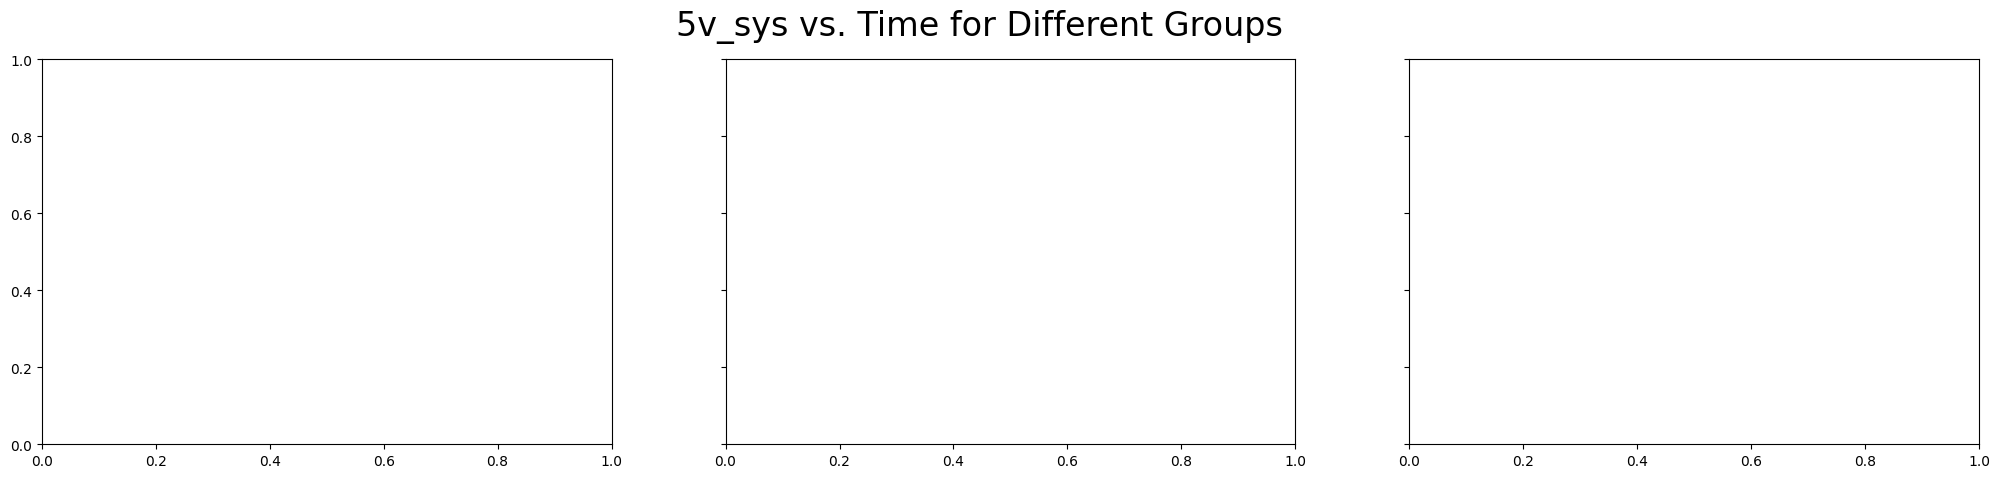

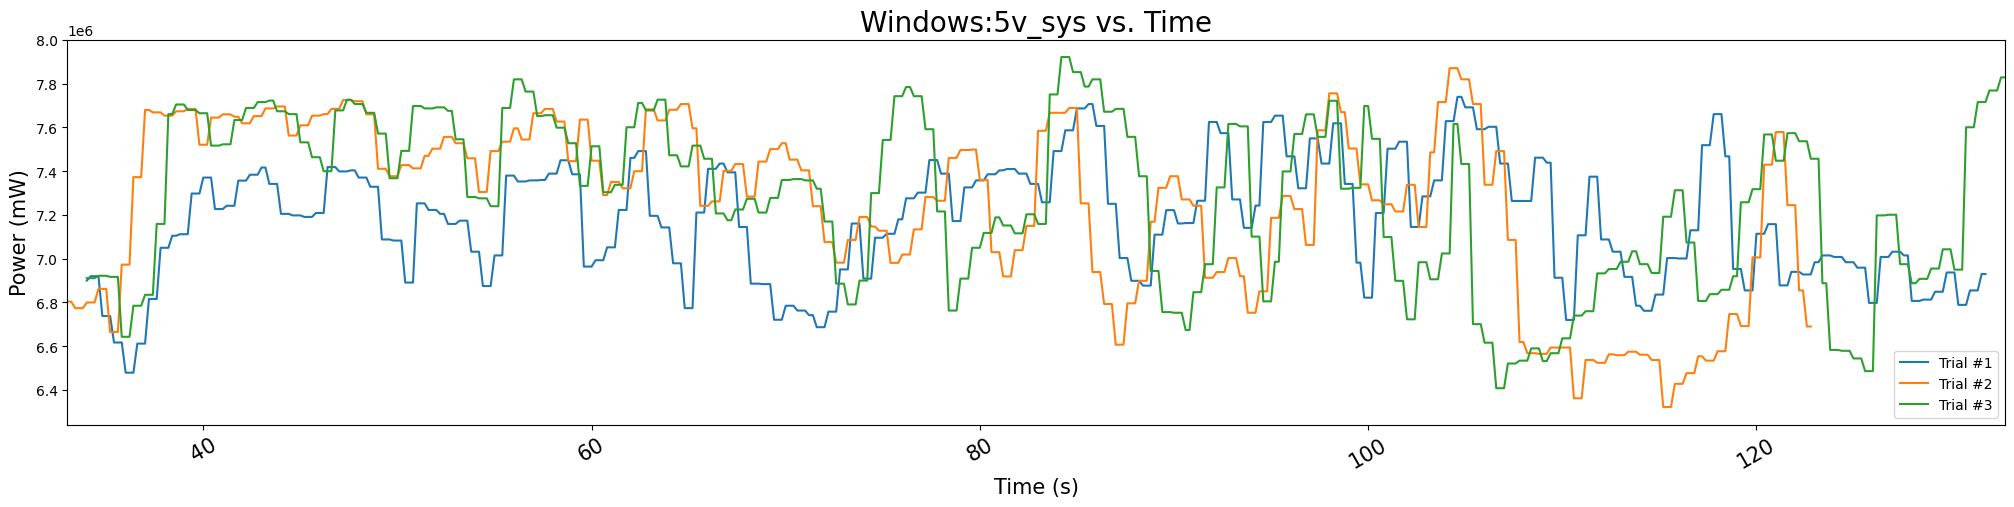

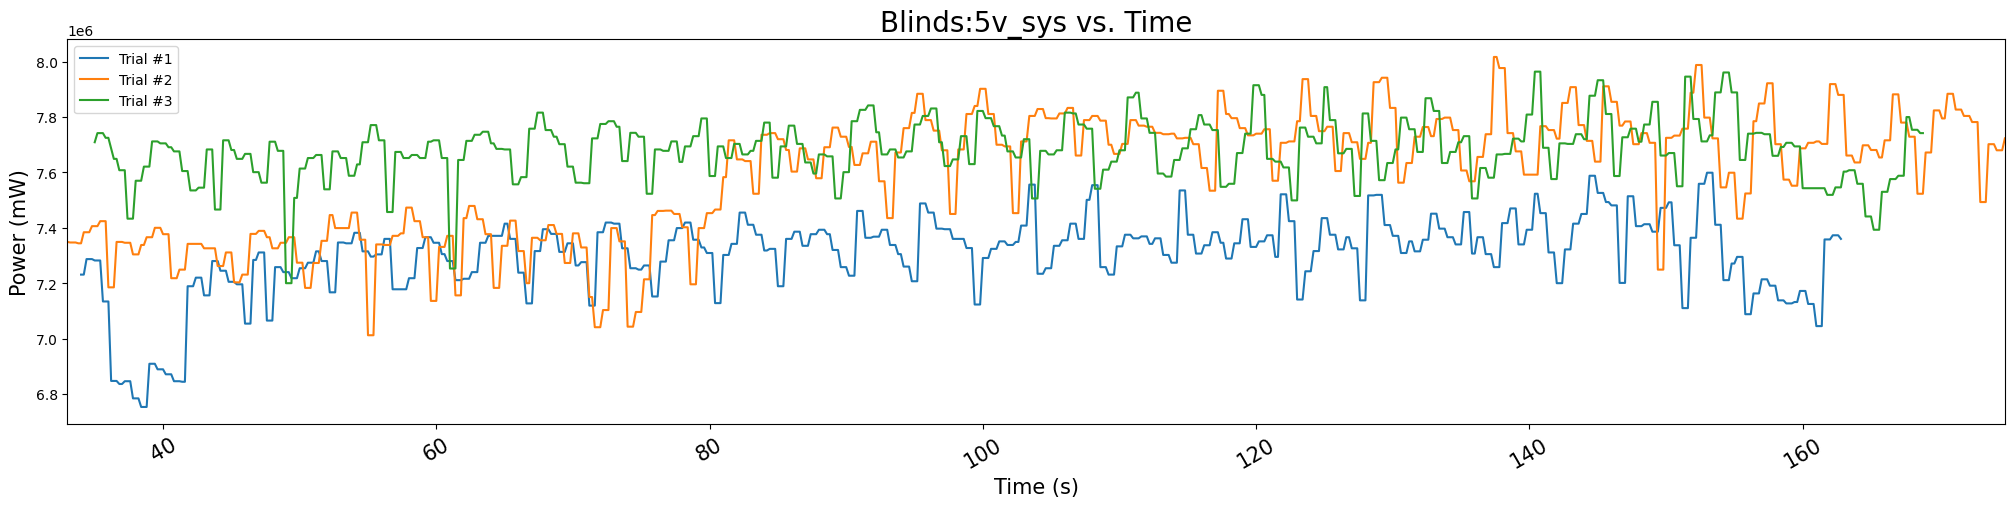

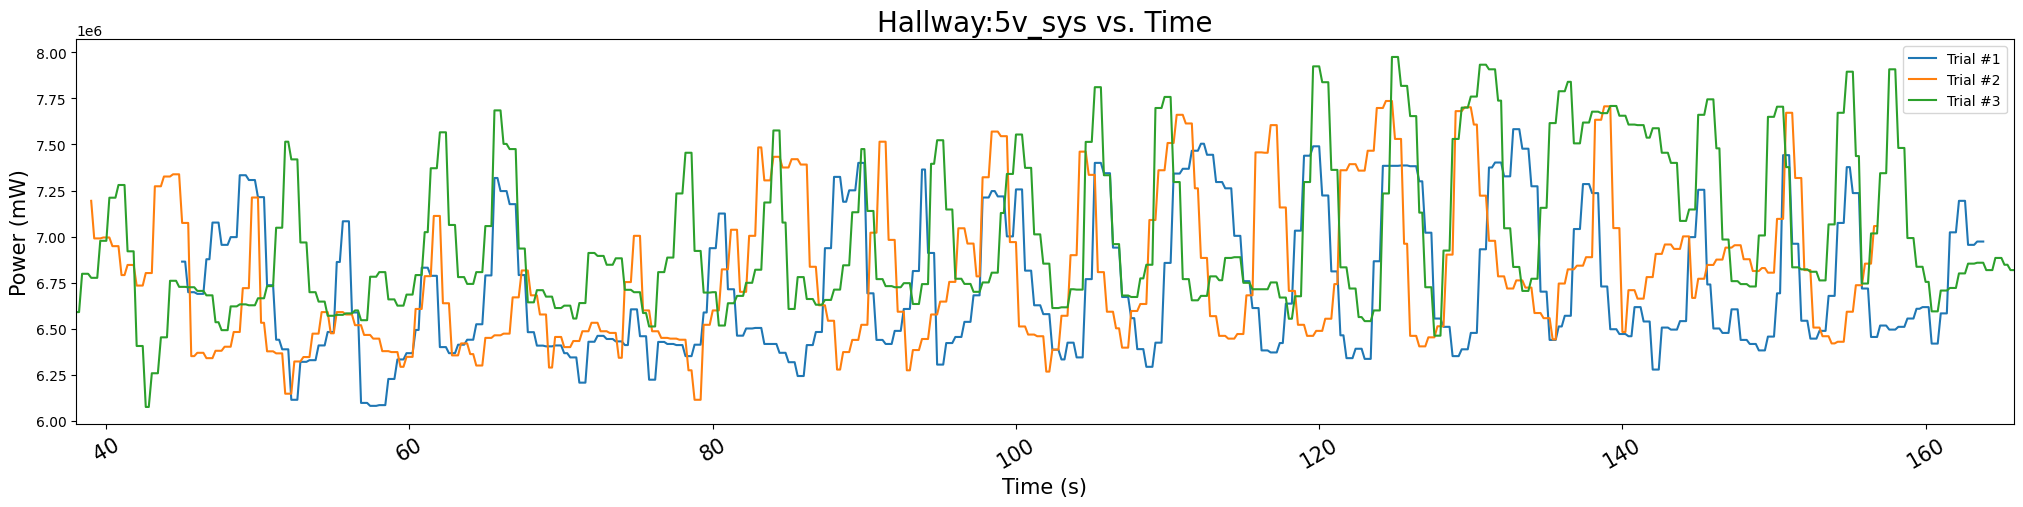

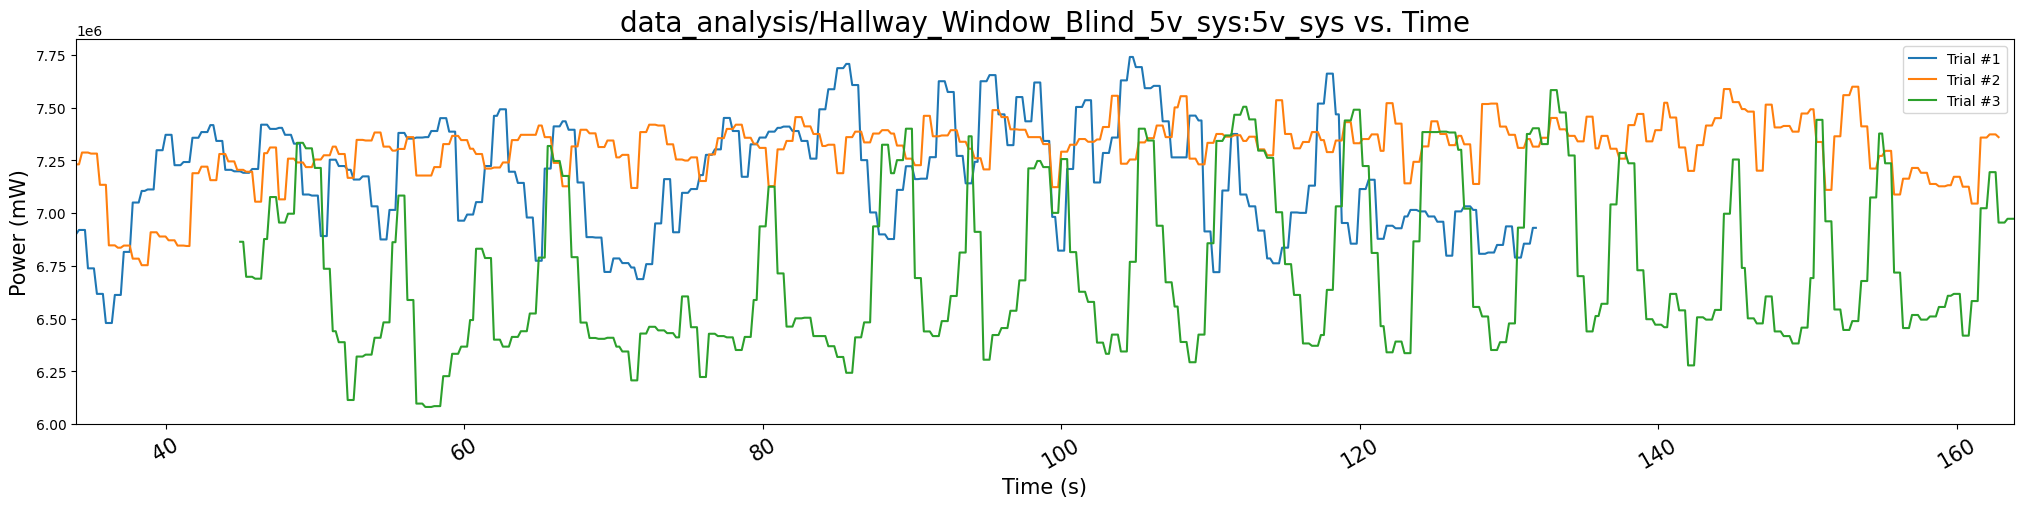

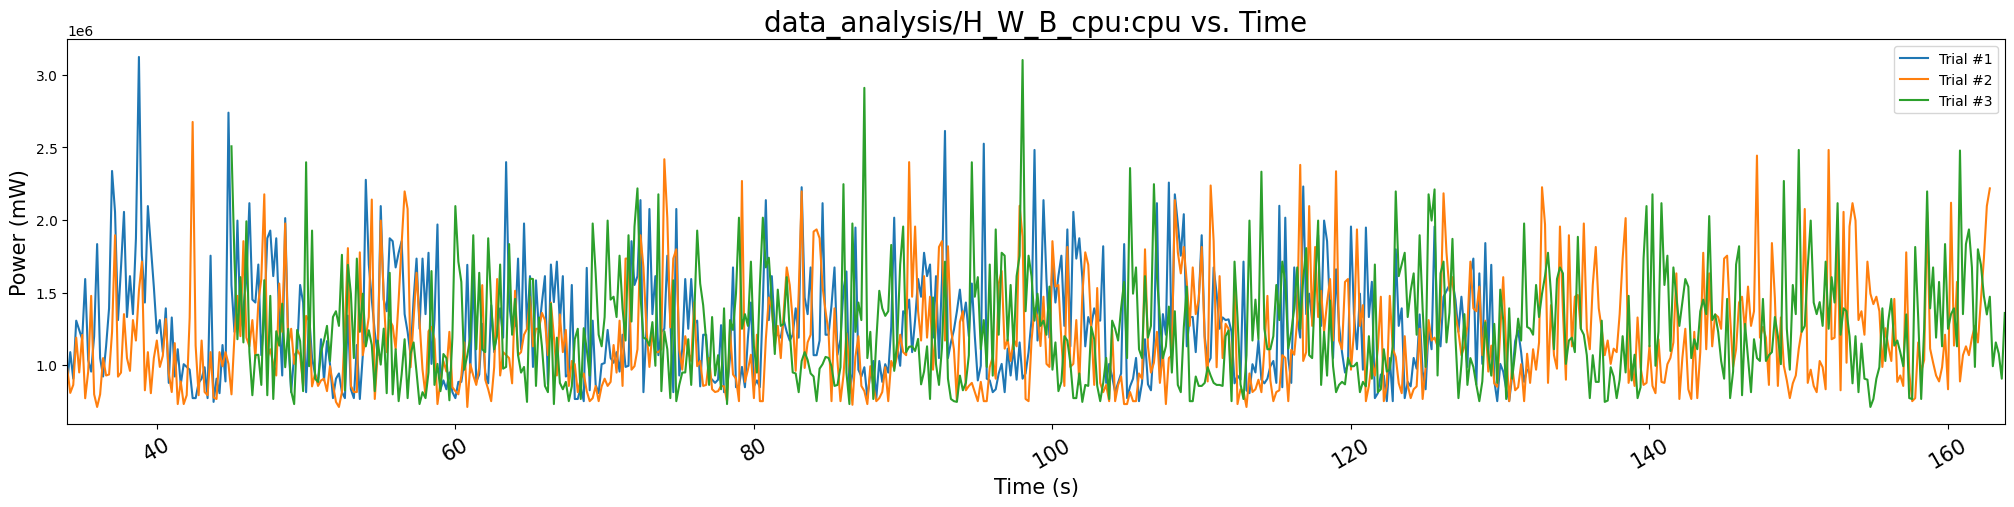

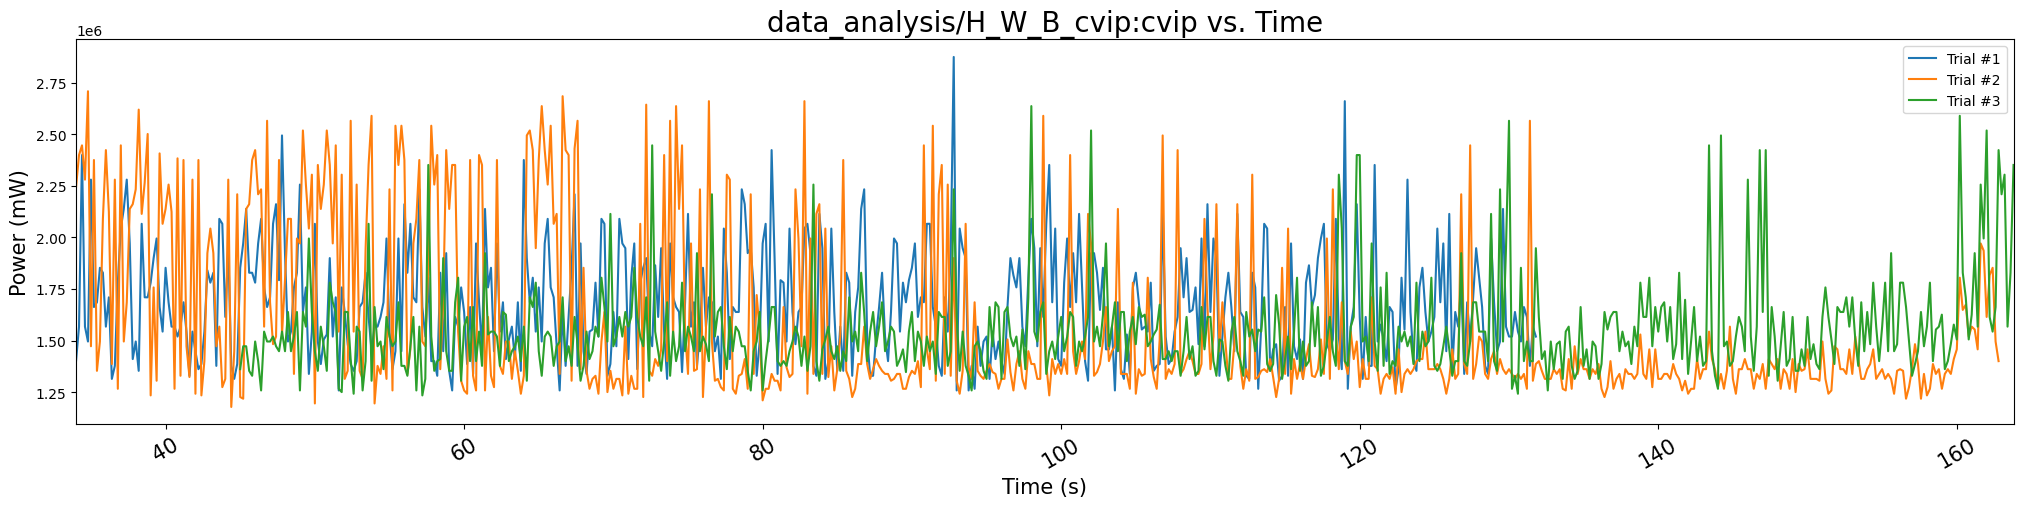

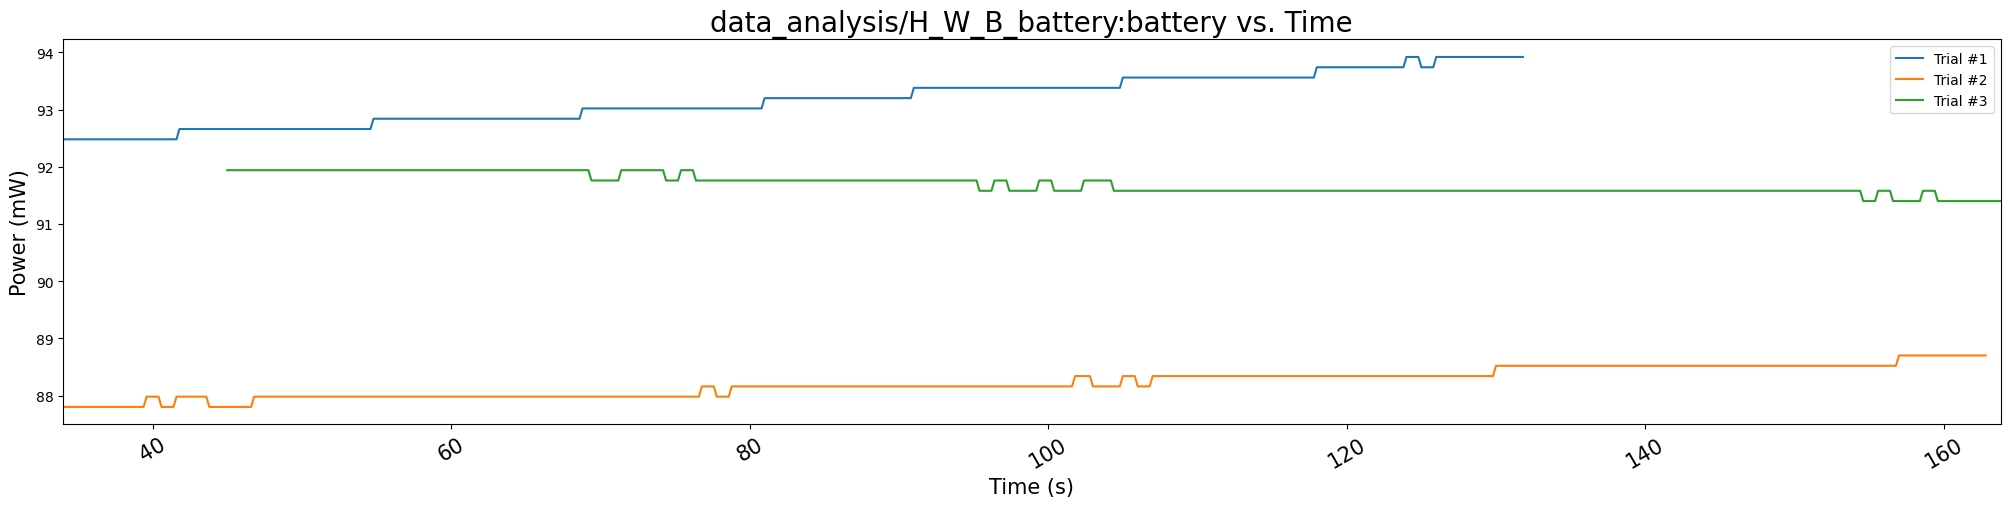

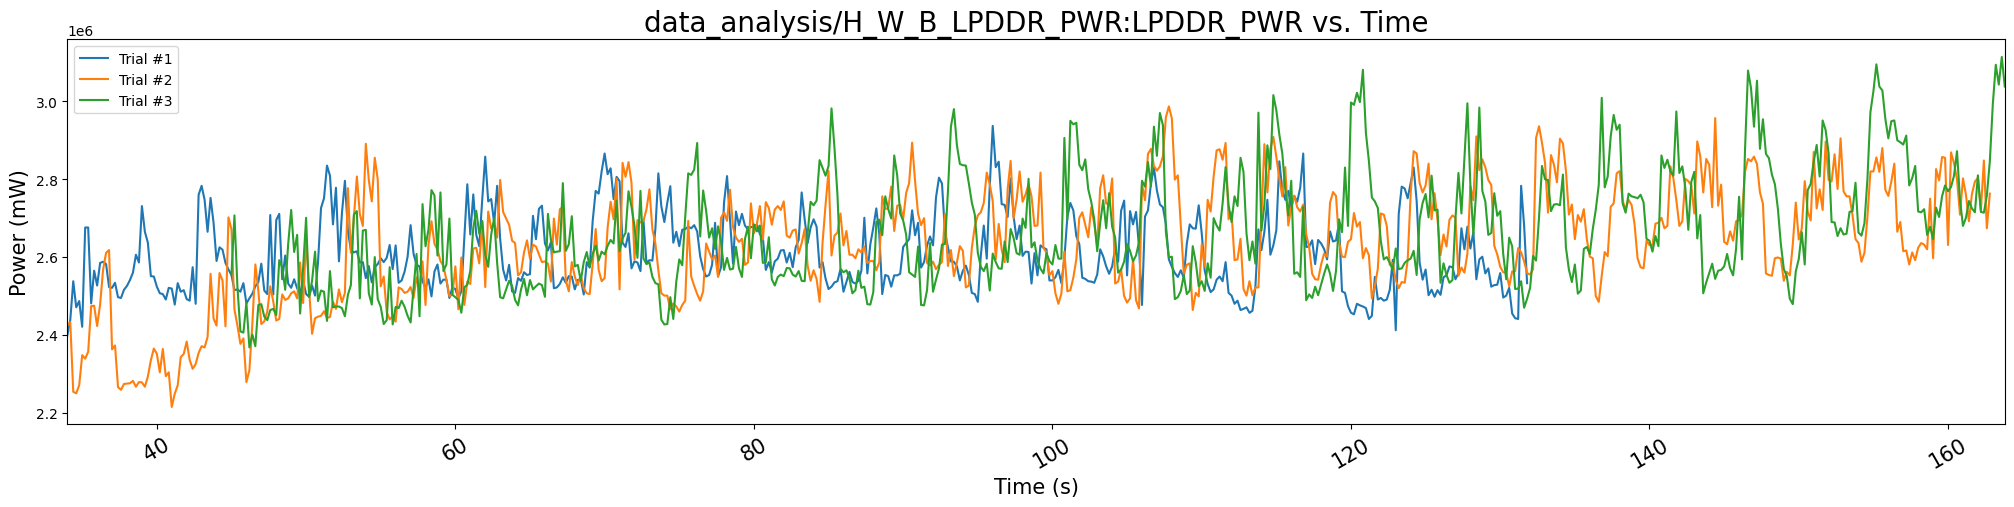

In [ ]:
total_h = [h_1, h_2, h_3]
total_w = [w_1, w_2, w_3]
total_b = [b_1, b_2, b_3]

plot_all_groups(total_h, total_w, total_b, '5v_sys')

plot_trials(total, '5v_sys', 'data_analysis/Hallway_Window_Blind_5v_sys')
plot_trials(total, 'cpu', 'data_analysis/H_W_B_cpu')
plot_trials(total, 'cvip', 'data_analysis/H_W_B_cvip')
plot_trials(total, 'battery', 'data_analysis/H_W_B_battery')
plot_trials(total, 'LPDDR_PWR', 'data_analysis/H_W_B_LPDDR_PWR')